In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV,ElasticNet,ElasticNetCV,LinearRegression
import statsmodels.api as sm
%matplotlib inline

In [2]:
df = pd.read_csv('Cars.csv')

In [3]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [4]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [5]:
df.tail()

,HP,MPG,VOL,SP,WT
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [6]:
df.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [8]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [9]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# Define features and target
X = df[['HP', 'VOL', 'SP', 'WT']]
y = df['MPG']


In [12]:
X

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [27]:
scaler = StandardScaler()

In [30]:
df1 = pd.DataFrame(arr)
df1

,0,1,2,3
0,-1.206295,-0.440611,-1.231403,-0.490238
1,-1.100587,-0.305252,-1.140871,-0.261299
2,-1.100587,-0.305252,-1.140871,-0.297993
3,-0.836315,-0.305252,-0.573239,-0.239103
4,-1.135823,-0.305252,-1.211826,-0.338878
...,...,...,...,...
76,3.603442,-2.200268,3.409929,-2.186236
77,2.123523,0.732494,2.060245,0.740025
78,2.563975,-2.200268,2.132755,-2.235028
79,3.127754,0.912972,3.292567,0.941462


In [31]:
arr = scaler.fit_transform(X)


In [32]:
arr

array([[-1.20629511, -0.44061061, -1.23140253, -0.49023816],
       [-1.1005866 , -0.30525236, -1.14087145, -0.26129934],
       [-1.1005866 , -0.30525236, -1.14087145, -0.29799301],
       [-0.83631531, -0.30525236, -0.57323872, -0.2391033 ],
       [-1.13582277, -0.30525236, -1.21182554, -0.33887816],
       [-0.83631531, -0.44061061, -0.59281571, -0.37881419],
       [-1.1005866 , -0.30525236, -1.14087145, -0.28256505],
       [-0.97726   , -2.20026792, -1.34399532, -2.22453536],
       [-0.97726   , -2.20026792, -1.34399532, -2.15581433],
       [-0.66013445, -0.21501352, -0.4182792 , -0.20042158],
       [-0.78346105, -0.44061061, -0.73472389, -0.40949027],
       [-0.44871742, -2.20026792, -0.27968395, -2.23718888],
       [-0.44871742,  0.01058357,  0.04007367,  0.05385348],
       [-0.78346105, -0.44061061, -0.73472389, -0.40746314],
       [-0.90678765, -0.44061061, -0.94758617, -0.41164734],
       [-0.78346105, -0.44061061, -0.73472389, -0.37710085],
       [-0.69537062, -0.

In [20]:
ProfileReport(df1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
vif_df = pd.DataFrame()

In [23]:
vif_df['vif'] = [variance_inflation_factor(arr,i) for i in range(arr.shape[1])]
vif_df['feature'] = X.columns

In [26]:
vif_df

,vif,feature
0,19.926589,HP
1,638.806084,VOL
2,20.007639,SP
3,639.533818,WT


In [36]:
df1

,0,1,2,3
0,-1.206295,-0.440611,-1.231403,-0.490238
1,-1.100587,-0.305252,-1.140871,-0.261299
2,-1.100587,-0.305252,-1.140871,-0.297993
3,-0.836315,-0.305252,-0.573239,-0.239103
4,-1.135823,-0.305252,-1.211826,-0.338878
...,...,...,...,...
76,3.603442,-2.200268,3.409929,-2.186236
77,2.123523,0.732494,2.060245,0.740025
78,2.563975,-2.200268,2.132755,-2.235028
79,3.127754,0.912972,3.292567,0.941462


In [37]:
df1 = df1.drop(columns = 1)

In [38]:
df1

,0,2,3
0,-1.206295,-1.231403,-0.490238
1,-1.100587,-1.140871,-0.261299
2,-1.100587,-1.140871,-0.297993
3,-0.836315,-0.573239,-0.239103
4,-1.135823,-1.211826,-0.338878
...,...,...,...
76,3.603442,3.409929,-2.186236
77,2.123523,2.060245,0.740025
78,2.563975,2.132755,-2.235028
79,3.127754,3.292567,0.941462


In [39]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=42)

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [44]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
}

# Initialize a dictionary to store R² scores
r2_scores = {}

# Fit each model and compute R² score
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    r2_scores[name] = r2

                       Model  R² Score
0          Linear Regression  0.677991
1              Random Forest  0.802775
2  Support Vector Regression  0.558359
3              Decision Tree  0.797472


Text(0.5, 1.0, 'R² Scores for Different Regression Models After Multicollinearity Adjustment')

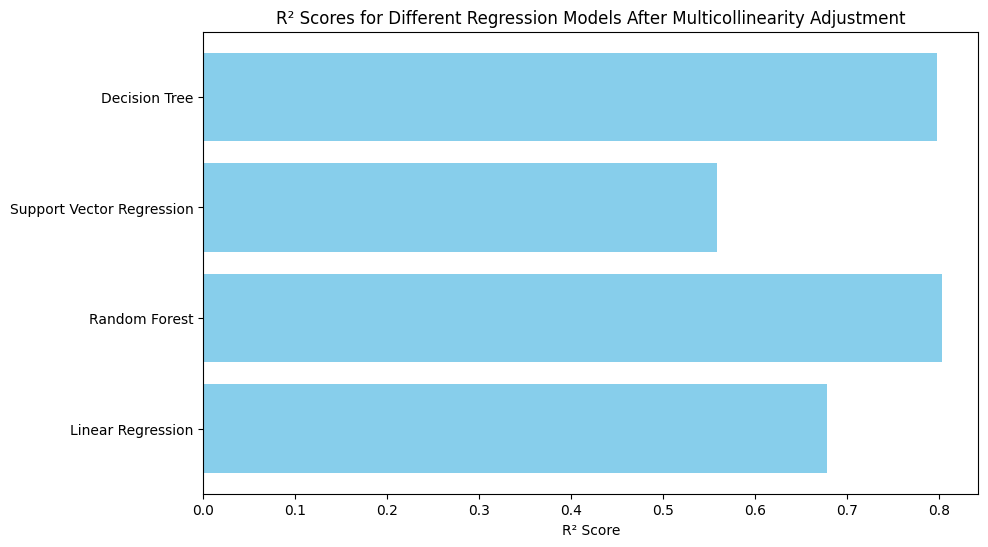

In [49]:
r2_table = pd.DataFrame(list(r2_scores.items()), columns=['Model', 'R² Score'])
print(r2_table)

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.barh(r2_table['Model'], r2_table['R² Score'], color='skyblue')
plt.xlabel('R² Score')
plt.title('R² Scores for Different Regression Models After Multicollinearity Adjustment')


### Conclusion
### Model Performance Summary

- **Random Forest Regression** has the highest R² score (**0.802775**), indicating that it explains approximately **80.3%** of the variance in the target variable (mileage, MPG) for the test set. This suggests that the Random Forest model captures the underlying patterns in the data effectively.

- **Linear Regression** (**0.677991**) shows moderate performance but does not capture as much variance compared to Random Forest. It might not adequately model the complexities of the relationships in your dataset.

- **Support Vector Regression** (**0.558359**) performs the least well, suggesting it may not be suitable for this particular dataset.

- **Decision Tree Regression** (**0.797472**) performs similarly to Random Forest but slightly worse, which is typical since Random Forest mitigates overfitting by averaging multiple decision trees.


### Final Model prediction using Random Forest

In [56]:
from sklearn.model_selection import cross_val_score

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters as needed
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate R² score for the test set
r2_rf = r2_score(y_test, y_pred_rf)

# Optional: Cross-validation for better evaluation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation
mean_cv_score = np.mean(cv_scores)

# Final output
print(f'Final R² Score for Random Forest Regression: {r2_rf:.4f}')
print(f'Mean Cross-Validation R² Score: {mean_cv_score:.4f}')

Final R² Score for Random Forest Regression: 0.7953
Mean Cross-Validation R² Score: 0.7786


### Model Performance Summary

- **Final R² Score (0.7953)**:
  This score indicates that your Random Forest model explains approximately **79.5%** of the variance in the test set. This is a strong performance, suggesting that the model captures most of the underlying patterns in the data related to car mileage (MPG).

- **Mean Cross-Validation R² Score (0.7786)**:
  The cross-validation score provides a more robust estimate of the model's performance across different subsets of the training data. A mean score of **77.9%** indicates that the model generalizes well to unseen data, though it's slightly lower than the test score, which is common.
